In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import splitfolders
import os
import numpy as np
from modelfunc import save_model

In [2]:
np.random.seed(123)

In [3]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
tf.get_logger().setLevel('ERROR')

In [5]:
datapath='../0. Project Data/Original Data'
org_data_dir = pathlib.Path(datapath).with_suffix('')
org_data_dir

WindowsPath('../0. Project Data/Original Data')

In [6]:
train_split_test_dir='../0. Project Data/Original Split Data'
splitfolders.ratio(org_data_dir, output=train_split_test_dir, seed=123, ratio=(.64, .16, .2)) # ratio of split are in order of train/val/test.

#### Image Parameters

In [7]:
batch_size = 32
img_height = 180
img_width = 180
img_channels = 3

In [8]:
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


In [9]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip('horizontal'), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [10]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [12]:
model.compile(optimizer='sgd', # Common optimizers include 'adam', 'sgd', and 'rmsprop'.
 loss='sparse_categorical_crossentropy', # Common loss functions include 'binary_crossentropy', 'categorical_crossentropy', and 'mse'.
 metrics=['accuracy']) #Common metrics include 'accuracy', 'precision', 'recall', and 'f1_score'.

In [13]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
84/84 [==============================] - 24s 228ms/step - loss: 1.3404 - accuracy: 0.3398 - val_loss: 1.3175 - val_accuracy: 0.3538
Epoch 2/100
84/84 [==============================] - 17s 207ms/step - loss: 1.2935 - accuracy: 0.4317 - val_loss: 1.2556 - val_accuracy: 0.5727
Epoch 3/100
84/84 [==============================] - 18s 210ms/step - loss: 1.2123 - accuracy: 0.4806 - val_loss: 1.0669 - val_accuracy: 0.5847
Epoch 4/100
84/84 [==============================] - 18s 213ms/step - loss: 1.1426 - accuracy: 0.5444 - val_loss: 1.0111 - val_accuracy: 0.6147
Epoch 5/100
84/84 [==============================] - 17s 207ms/step - loss: 1.0248 - accuracy: 0.5986 - val_loss: 0.8943 - val_accuracy: 0.6312
Epoch 6/100
84/84 [==============================] - 18s 213ms/step - loss: 0.9347 - accuracy: 0.6374 - val_loss: 1.1720 - val_accuracy: 0.5052
Epoch 7/100
84/84 [==============================] - 18s 217ms/step - loss: 0.8877 - accuracy: 0.6535 - val_loss: 0.7005 - val_accuracy:

84/84 [==============================] - 17s 207ms/step - loss: 0.2331 - accuracy: 0.9074 - val_loss: 0.2605 - val_accuracy: 0.8906
Epoch 58/100
84/84 [==============================] - 17s 206ms/step - loss: 0.2594 - accuracy: 0.8969 - val_loss: 0.2583 - val_accuracy: 0.8891
Epoch 59/100
84/84 [==============================] - 17s 207ms/step - loss: 0.3030 - accuracy: 0.8940 - val_loss: 0.3319 - val_accuracy: 0.8831
Epoch 60/100
84/84 [==============================] - 17s 207ms/step - loss: 0.2511 - accuracy: 0.9010 - val_loss: 0.2642 - val_accuracy: 0.8906
Epoch 61/100
84/84 [==============================] - 17s 204ms/step - loss: 0.2230 - accuracy: 0.9134 - val_loss: 0.2946 - val_accuracy: 0.8786
Epoch 62/100
84/84 [==============================] - 17s 207ms/step - loss: 0.2295 - accuracy: 0.9040 - val_loss: 0.2645 - val_accuracy: 0.8921
Epoch 63/100
84/84 [==============================] - 17s 205ms/step - loss: 0.2213 - accuracy: 0.9085 - val_loss: 0.3705 - val_accuracy: 0.848

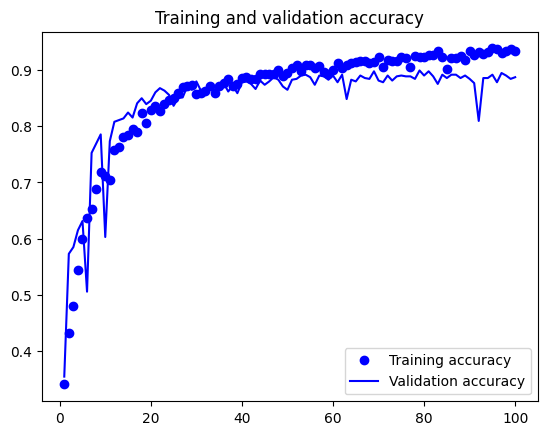

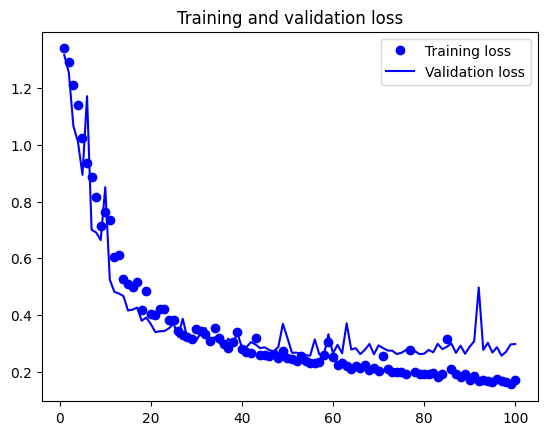

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [15]:
save_path = '../3. Model Selection/saved_models/Model 1-Original Data/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_model(model, save_path)

Saved model to disk


In [16]:
#below saved files are gitignored

In [20]:
if not os.path.exists('./saved_models/Model 1-Original Data'):
    os.makedirs('./saved_models/Model 1-Original Data')
model.save('./saved_models/Model 1-Original Data')